<h2>Practical Tasks. Lesson 2<h2>

<h3>Import modules<h3>

In [108]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<h3>Common code<h3>

In [109]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [110]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [111]:
def sign(coeffs):
    # функция, используемая при расчете градиента в L1 регуляризации
    s = []
    for coeff in coeffs:
        s.append((coeff >= 0) * 1.0 + (coeff < 0) * -1.0)
    return np.array(s)

In [112]:
X = np.array(
            [[   1,    1,  500,    1],
            [   1,    1,  700,    1],
            [   1,    2,  750,    2],
            [   1,    5,  600,    1],
            [   1,    3, 1450,    2],
            [   1,    0,  800,    1],
            [   1,    5, 1500,    3],
            [   1,   10, 2000,    3],
            [   1,    1,  450,    1],
            [   1,    2, 1000,    2]]
            )

X_st = X.copy().astype(np.float64)
for i in range(1, X_st.shape[1]):
    X_st[:, i] = standard_scale(X_st[:, i])     

In [113]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [115]:
# разбиваем на трейн и тест
train_amount = 7
train_X = X_st[:train_amount]
train_y = y[:train_amount]
test_X = X_st[train_amount:]
test_y = y[train_amount:]

<h3>Task 1<h3>

In [116]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        W -= eta * (dQ + dReg)
    return W

In [117]:
alpha_arr = np.linspace(1, 1e-5, 25)

In [118]:
w = np.zeros(X_st.shape[1])
w_list = []
MSE_train = []
MSE_test = []

for alpha in alpha_arr:
    w_curr = gradient_descent_reg_l2(train_X, train_y, iterations=5000, eta=1e-3, reg=alpha) # текущие веса
    w_list.append(w_curr)
    MSE_train.append(calc_mse(train_y, np.dot(train_X, w_curr))) # ошибка на трейне
    MSE_test.append(calc_mse(test_y, np.dot(test_X, w_curr))) # ошибка на тесте

In [119]:
w_list_arr = np.array(w_list)
MSE_train_arr = np.array(MSE_train)
MSE_test_arr = np.array(MSE_test)

Text(0, 0.5, 'MSE')

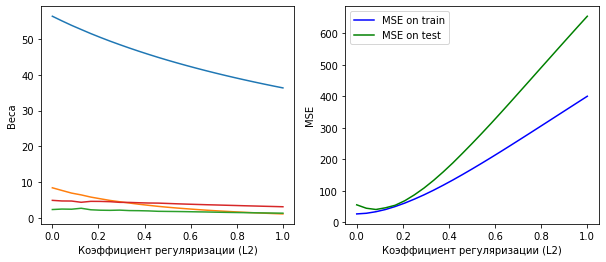

In [120]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
ax1, ax2 = axs

for i in range(w_list_arr.shape[1]):
    ax1.plot(alpha_arr, w_list_arr[:, i])
ax2.plot(alpha_arr, MSE_train_arr, 'b', label='MSE on train')
ax2.plot(alpha_arr, MSE_test_arr, 'g', label='MSE on test')
ax2.legend()

ax1.set_xlabel('Коэффициент регуляризации (L2)')
ax1.set_ylabel('Веса')
ax2.set_xlabel('Коэффициент регуляризации (L2)')
ax2.set_ylabel('MSE')

ВЫВОД: при значениях коэффициента регуляризации около 0.1-0.2 значение MSE на трейне и тесте
близки. При значениях коэффициента из указанного диапазона переобучение незначительно, модель хорошо описывает данные.

<h3>Task 2<h3>

In [121]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * sign(W) # градиент регуляризации
        W -= eta * (dQ + dReg)
    return W

In [122]:
alpha_arr = np.linspace(10, 1e-5, 50)

In [123]:
w = np.zeros(X_st.shape[1])
w_list = []
MSE_train = []
MSE_test = []

for alpha in alpha_arr:
    w_curr = gradient_descent_reg_l1(train_X, train_y, iterations=5000, eta=1e-3, reg=alpha) # текущие веса
    w_list.append(w_curr)
    MSE_train.append(calc_mse(train_y, np.dot(train_X, w_curr))) # ошибка на трейне
    MSE_test.append(calc_mse(test_y, np.dot(test_X, w_curr))) # ошибка на тесте

In [124]:
w_list_arr = np.array(w_list)
MSE_train_arr = np.array(MSE_train)
MSE_test_arr = np.array(MSE_test)

Text(0, 0.5, 'MSE')

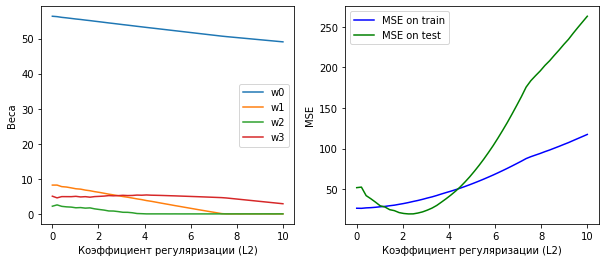

In [125]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
ax1, ax2 = axs

for i in range(w_list_arr.shape[1]):
    ax1.plot(alpha_arr, w_list_arr[:, i], label='w' + str(i))
ax1.legend()

ax2.plot(alpha_arr, MSE_train_arr, 'b', label='MSE on train')
ax2.plot(alpha_arr, MSE_test_arr, 'g', label='MSE on test')
ax2.legend()

ax1.set_xlabel('Коэффициент регуляризации (L2)')
ax1.set_ylabel('Веса')
ax2.set_xlabel('Коэффициент регуляризации (L2)')
ax2.set_ylabel('MSE')

Вывод: значения MSE на трейне и тесте сравниваются при двух значениях коэффициента регуляризации, которые можно считать оптимальными. Также из левого графика видно, что коэффициент регрессии w2 с ростом коэффициента регуляризации зануляется первым. Соответствующий признак, стоимость за час, является наименее существенным.